torch.nn is a PyTorch module that provides tools to build neural networks easily.

It contains classes and functions for:

Layers → nn.Linear, nn.Conv2d, nn.LSTM, etc.

Activations → nn.ReLU, nn.Sigmoid, etc.

Loss functions → nn.CrossEntropyLoss, nn.MSELoss, etc.

Containers → nn.Sequential, nn.ModuleList, etc.


In [838]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

### Data Preparing and Loading

Linear regression = `Y = mX + c`


Weights and biases are the key parameters that a neural network learns during training.

Weights → Numbers that control how much influence one neuron has on another.
Example: In a linear layer `y = Wx + b`, W is the weight matrix.

Biases → Numbers added to the output to shift it up or down.
Example: b in the same formula lets the model fit data not passing through the origin.


In [839]:
weight = 0.7
bias = 0.3

start=0
end=1
step=0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [840]:
X[:10],y[:10],

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting and training data


In [841]:
train_split = int(0.8 * len(X))

X_train, Y_train, = X[:train_split], y[:train_split]
X_test, Y_test= X[train_split:], y[train_split:]

In [842]:
X.shape, X_train.shape, X_test.shape

(torch.Size([50, 1]), torch.Size([40, 1]), torch.Size([10, 1]))

In [843]:

def plot_prediction(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=None
):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size":14})
    plt.show()


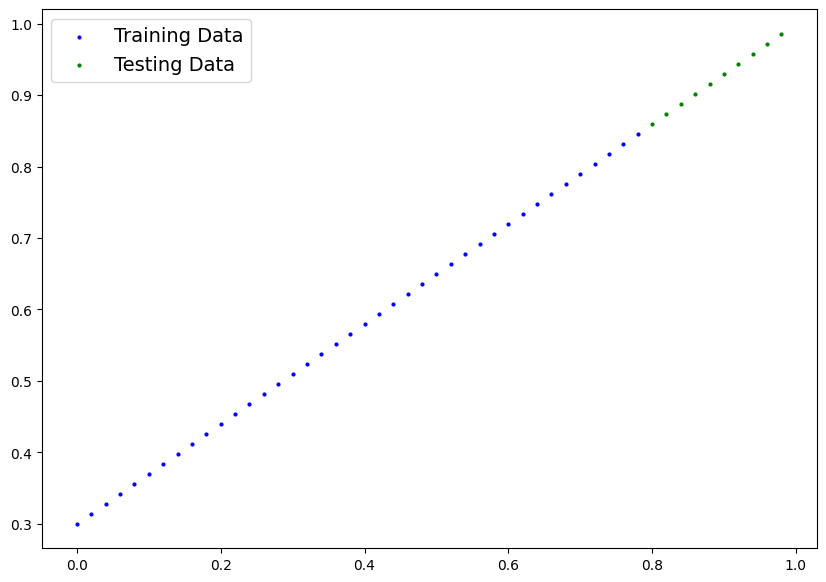

In [844]:
plot_prediction()

### Build Model


In [845]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


#### Create a random seed


In [846]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [847]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making prediction with model


In [848]:
with torch.inference_mode():
    y_pred = model_0(X_test)

# with torch.no_grad():
#     y_pred = model_0(X_test)


y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

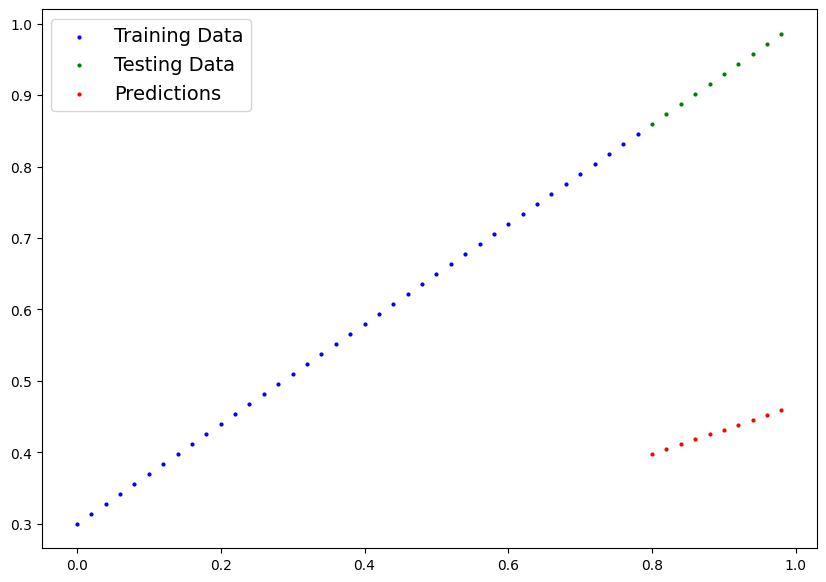

In [849]:
plot_prediction(predictions=y_pred)

In [850]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

nn.L1Loss() is a loss function (also called criterion).

Computes the mean absolute error (MAE) between predictions and targets:

### L1Loss=N1​∑∣ypred​−ytrue​∣


torch.optim.SGD is the Stochastic Gradient Descent optimizer.

Updates the model parameters (weight and bias) based on the gradients computed during backpropagation.

Important: You need to instantiate it with parameters and learning rate.


In [851]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [852]:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Building a training loop and testing loop


Put the model in training mode

Compute predictions → y_pred

Compute loss → loss

Zero gradients → optimizer.zero_grad()

Backpropagate → loss.backward()

Update weights → optimizer.step()

Optionally switch to evaluation mode


In [853]:
torch.manual_seed(42)

epochs = 175  # epochs is one loop through the data..

epoch_count = []
loss_values =[]
test_loss_values = []

# loop through the data

for epoch in range(epochs):
    
    model_0.train() 

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, Y_train)
    # print(f"Loss: {loss}")

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()  

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, Y_test)
    
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")

print(model_0.state_dict())

Epoch 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Epoch 140 | Loss

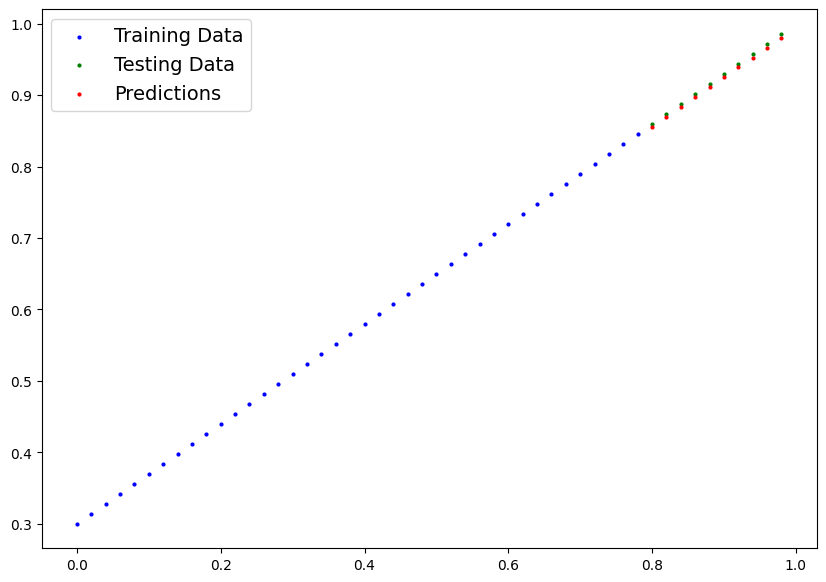

In [854]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

plot_prediction(predictions=y_pred_new)

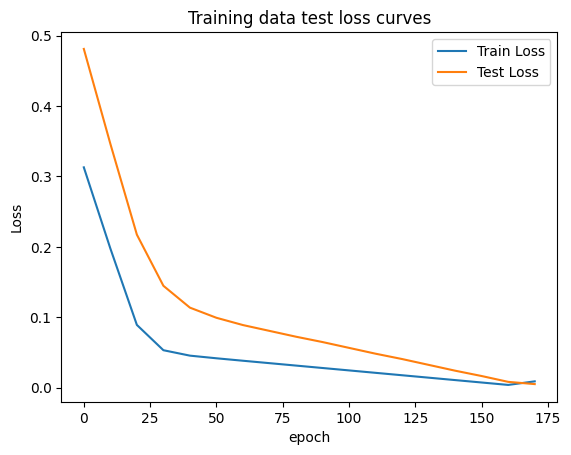

In [855]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values) .numpy()), label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title("Training data test loss curves")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend()

### Saving a Model in PyTorch


In [856]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [857]:
torch.save(model_0.state_dict(), "../models/model_0.pth")


In [858]:
model_path = '../models/model_0.pth'
model = LinearRegressionModel()

model.load_state_dict(torch.load(model_path))

model.eval()
with torch.inference_mode():
    y_pred_loaded = model(X_test)

print(y_pred_loaded[:10])


tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])


In [859]:
test_loss = loss_fn(y_pred_loaded, Y_test)
print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 0.0050


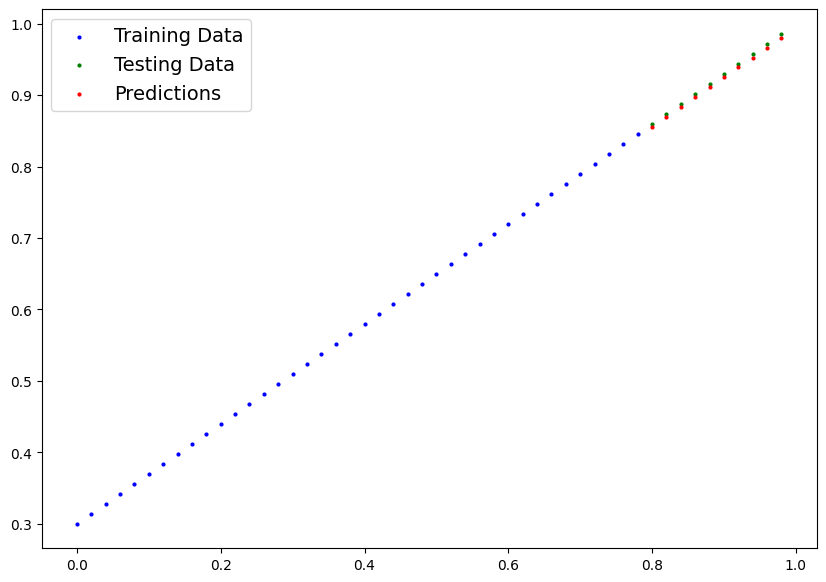

In [860]:
plot_prediction(X_train, Y_train, X_test, Y_test, predictions=y_pred_loaded)


### Putting all together


In [861]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

"cuda" if torch.cuda.is_available() else "cpu"

'cpu'

### Building a PyTorch Linear Model


In [862]:


class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [863]:
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

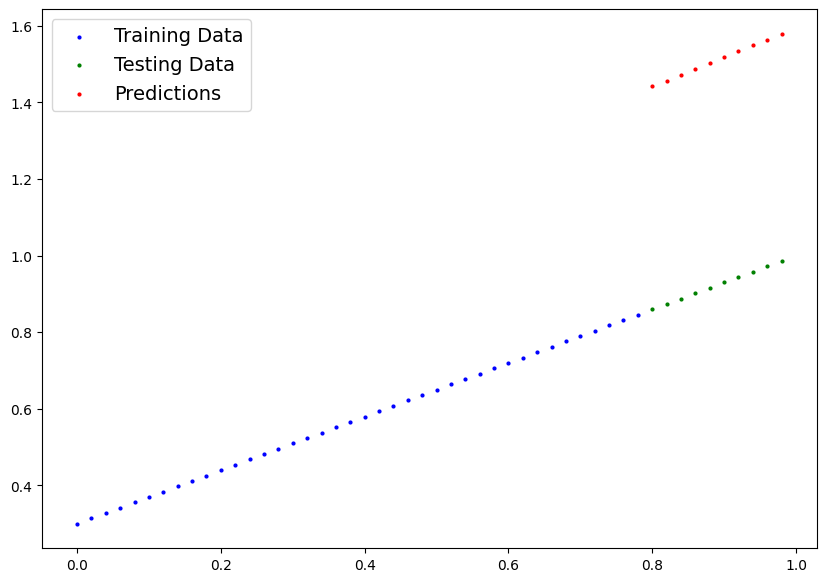

In [864]:
with torch.inference_mode():
    y_pred = model_2(X_test)

plot_prediction(predictions=y_pred)

In [865]:
next(model_2.parameters()).device

device(type='cpu')

In [866]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [872]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train)
    loss=loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")



Epoch 0 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 100 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 200 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 300 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 400 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 500 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 600 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 700 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 800 | Train Loss: 0.0013 | Test Loss: 0.0050
Epoch 900 | Train Loss: 0.0013 | Test Loss: 0.0050


In [873]:
with torch.inference_mode():
    y_pred = model_2(X_test)

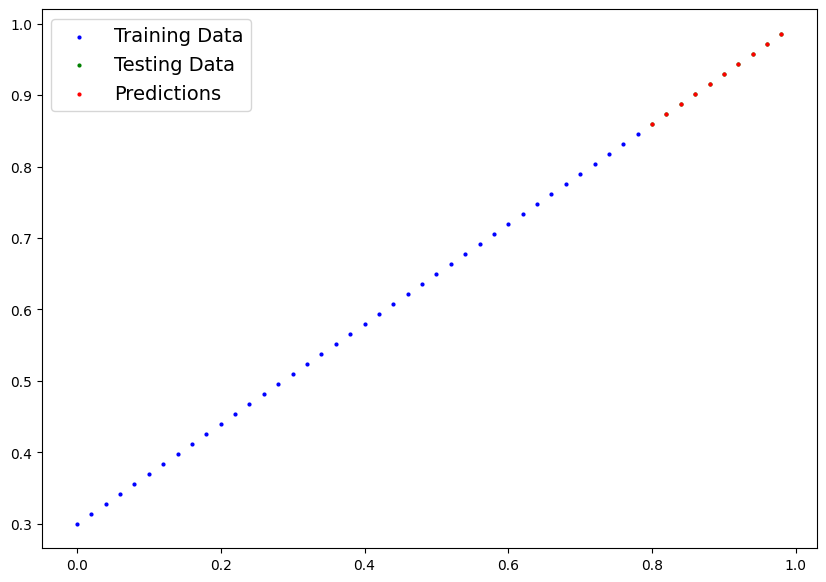

In [874]:
plot_prediction(predictions=y_pred)

In [875]:
torch.save(model_2.state_dict(), "../models/model_2.pth")

In [877]:
model_path = '../models/model_2.pth'

model = LinearRegressionModelV2()

model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [878]:
with torch.inference_mode():
    y_pred = model(X_test)

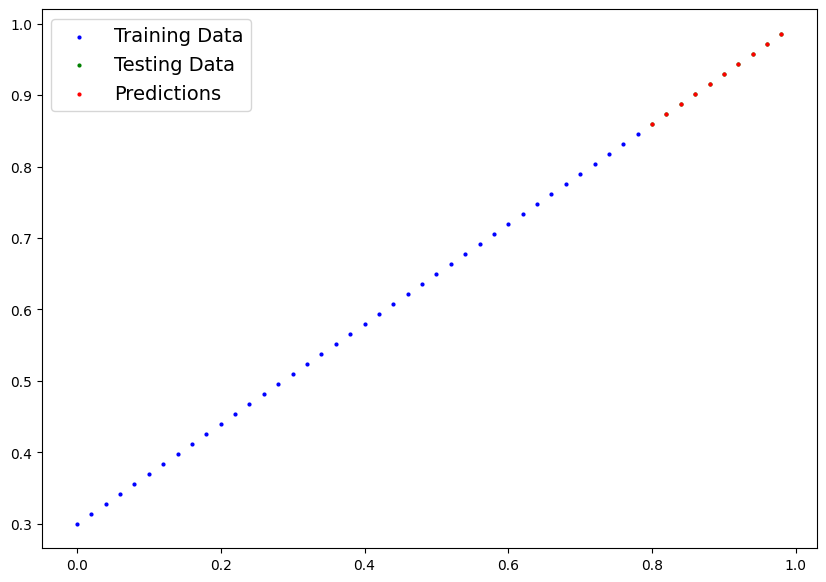

In [879]:
plot_prediction(predictions=y_pred)